In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fcnet import *
from layers import *
from Trainer import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
labeled_images = pd.read_csv('train.csv')
test_images = pd.read_csv('test.csv')

print(labeled_images['label'])


0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, dtype: int64


In [3]:
labeled_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
labels = labeled_images.iloc[:, 0].as_matrix()
images = labeled_images.iloc[:, 1:].as_matrix()

(28000, 784)


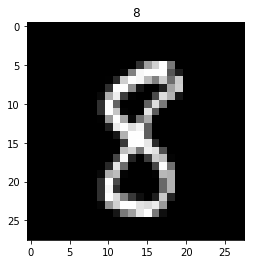

In [72]:
i = 618
img = images[i].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(labels[i])

image_test = test_images.as_matrix()
print(image_test.shape)

In [79]:
num_train = 32000
image_train = images[:num_train]
label_train = labels[:num_train]

image_val = images[num_train:]
label_val = labels[num_train:]


In [80]:
data = {'X_train': image_train, 'y_train': label_train, 'X_val': image_val, 'y_val': label_val}
# net = FullyConnectNet(layers=[200, 10], input_dim=28*28, reg=1e-1, weight_scale=1e-2)
# trainer = Trainer(net, data, batch_size=100, epoch_nums=10)

In [89]:
learn_rates = 10 ** np.random.uniform(-3, -2, 5)
weight_scales = 10 ** np.random.uniform(-3, -1, 3)

best_net = None

best_lr = None

best_ws = None

best_val_acc = 0

for lr in learn_rates:
    for ws in weight_scales:
        net = FullyConnectNet(layers=[200, 10], input_dim=28*28, reg=1e-1, weight_scale=ws)
        trainer = Trainer(net, data, batch_size=100, epoch_nums=10, learning_rate=lr)
        _ = trainer.train()
        train_acc = trainer.check_train_accuracy()
        val_acc = trainer.check_val_accuracy()
        
        if val_acc > best_val_acc:
            best_net = net
        
        print('learning_rate %f weight_scale %f  train acc %f val acc %f'%(lr, ws, train_acc, val_acc))

learning_rate 0.004968 weight_scale 0.038397  train acc 0.097531 val acc 0.101100
learning_rate 0.004968 weight_scale 0.021065  train acc 0.097531 val acc 0.101100
learning_rate 0.004968 weight_scale 0.003947  train acc 0.984781 val acc 0.967700
learning_rate 0.002524 weight_scale 0.038397  train acc 0.097531 val acc 0.101100
learning_rate 0.002524 weight_scale 0.021065  train acc 0.990187 val acc 0.969200
learning_rate 0.002524 weight_scale 0.003947  train acc 0.991781 val acc 0.972500
learning_rate 0.001439 weight_scale 0.038397  train acc 0.097531 val acc 0.101100
learning_rate 0.001439 weight_scale 0.021065  train acc 0.988656 val acc 0.963800
learning_rate 0.001439 weight_scale 0.003947  train acc 0.990688 val acc 0.975000
learning_rate 0.005451 weight_scale 0.038397  train acc 0.097531 val acc 0.101100
learning_rate 0.005451 weight_scale 0.021065  train acc 0.097531 val acc 0.101100
learning_rate 0.005451 weight_scale 0.003947  train acc 0.965781 val acc 0.951400
learning_rate 0.

In [85]:
predict_labels = best_net.predict(image_test)

In [86]:
df = pd.DataFrame(predict_labels, columns=['Label'])
df.index += 1
df.index.name = 'ImageId'

In [87]:
print(df[:10])

         Label
ImageId       
1            2
2            0
3            9
4            9
5            3
6            7
7            0
8            3
9            0
10           3


In [88]:
df.to_csv('result.csv')